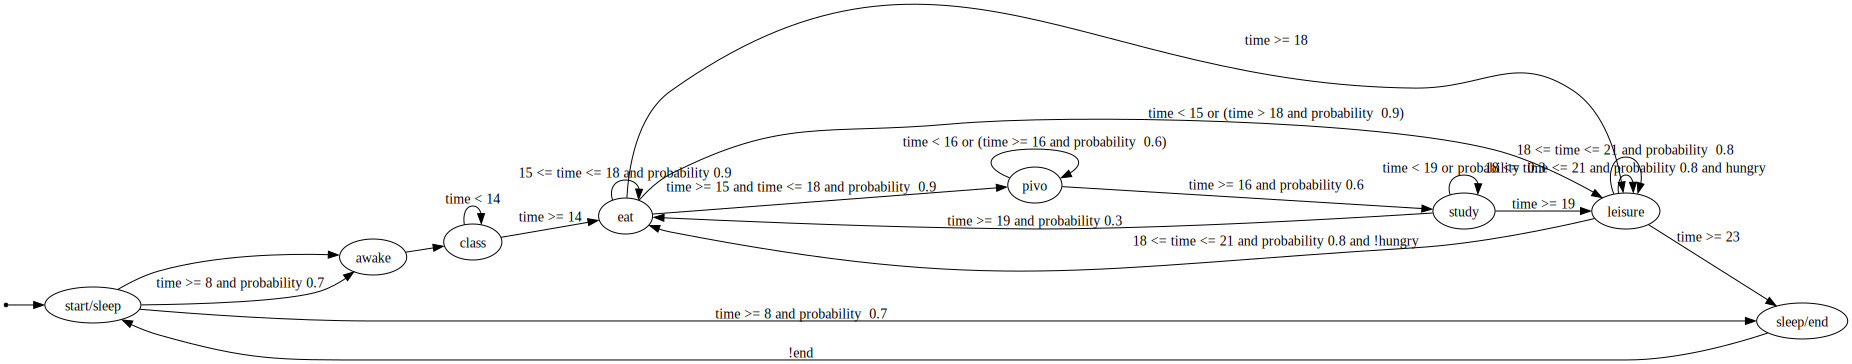

In [4]:
import random
from graphviz import Source

with open('day.dot') as f:
    dot_graph = f.read()
s = Source(dot_graph)
s

In [5]:
import random

class StudentDayFSM:
    def __init__(self):
        self.time = 0
        self.stopped = False

    def run(self):
        self._create_asleep()

    def _create_awake(self):
        print(f"{self.time} Awake and ready to start the day!")
        while True:
            if self.time >= 8:
                print(f"{self.time} Time to get ready for the day!")
                self.time += 1
                return self._create_class_state()

    def _create_class_state(self):
        print(f"{self.time} Going to class...")
        while True:
            if self.time >= 14:
                print(f"{self.time} Class is over. Time for lunch!")
                self.time += 1
                return self._create_eat()
            else:
                print(f"{self.time} Attending class...")
                self.time += 1

    def _create_eat(self):
        print(f"{self.time} Having meal...")
        while True:
            if 15 <= self.time <= 18 and random.random() < 0.9:
                print(f"{self.time} Lunchtime is over. Time for pivo!")
                self.time += 1
                return self._create_pivo()
            elif self.time >= 18:
                print(f"{self.time} Dinner is over. Time for leisure!")
                self.time += 1
                return self._create_leisure(False)
            else:
                print(f"{self.time} Lunchtime is over. Time for leisure!")
                self.time += 1
                return self._create_leisure()

    def _create_study(self):
        print(f"{self.time} Studying...")
        while True:
            if self.time >= 19:
                if random.random() < 0.3:
                    print(f"{self.time} Study session is over. Time to have a meal!")
                    self.time += 1
                    return self._create_eat()
                print(f"{self.time} Study session is over. Time for leisure!")
                self.time += 1
                return self._create_leisure()
            else:
                print(f"{self.time} Still studying...")
                self.time += 1

    def _create_leisure(self, hungry=True):
        print(f"{self.time} Having fun and enjoying leisure time...")
        while True:
            if 18 <= self.time <= 21 and random.random() < 0.8 and hungry:
                print(f"{self.time} Leisure is over. Time for dinner!")
                self.time += 1
                return self._create_eat()
            if self.time >= 23:
                print(f"{self.time} Leisure is over...")
                self.time += 1
                return self._create_asleep(True)
            else:
                print(f"{self.time} Enjoying leisure...")
                self.time += 1

    def _create_pivo(self):
        print(f"{self.time} Having pivo...")
        while True:
            if self.time >= 16 and random.random() < 0.6:
                print(f"{self.time} Pivo is over. Time for study!")
                self.time += 1
                return self._create_study()
            else:
                print(f"{self.time} Still having pivo...")
                self.time += 1

    def _create_asleep(self, end=False):
        if end:
            print(f"{self.time} Day is over. Going to bed...")
        else:
            print(f"{self.time} Starting the day...")
            while True:
                if self.time >= 8 and random.random() < 0.7:
                    print(f"{self.time} Waking up...")
                    self.time += 1
                    return self._create_awake()
                else:
                    print(f"{self.time} Sleeping...")
                    self.time += 1


In [6]:

student = StudentDayFSM()
student.run()

0 Starting the day...
0 Sleeping...
1 Sleeping...
2 Sleeping...
3 Sleeping...
4 Sleeping...
5 Sleeping...
6 Sleeping...
7 Sleeping...
8 Waking up...
9 Awake and ready to start the day!
9 Time to get ready for the day!
10 Going to class...
10 Attending class...
11 Attending class...
12 Attending class...
13 Attending class...
14 Class is over. Time for lunch!
15 Having meal...
15 Lunchtime is over. Time for pivo!
16 Having pivo...
16 Still having pivo...
17 Pivo is over. Time for study!
18 Studying...
18 Still studying...
19 Study session is over. Time for leisure!
20 Having fun and enjoying leisure time...
20 Leisure is over. Time for dinner!
21 Having meal...
21 Dinner is over. Time for leisure!
22 Having fun and enjoying leisure time...
22 Enjoying leisure...
23 Leisure is over...
24 Day is over. Going to bed...
